# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 69.4 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 62.8 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.5 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 63.2 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 77.3 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 65.3 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 62.8 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 65.8 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 72.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 63.1 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 68.7 MB/s eta 0:00:01


     |████████████████████████████████| 93 kB 2.7 MB/s  eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=bfe21cbc6fd4df5d94ee2b8ea0db930a9618e5ad8336dc9da947ee64a0afc2ba
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement prompt-toolkit>=3.0.30, but you'll have prompt-toolkit 3.0.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.
  Consider adding this direc

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import tqdm

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
from torch.utils.data import DataLoader

In [3]:
# Define transforms
## YOUR CODE HERE ##
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,))])

# Create training set and define training dataloader
## YOUR CODE HERE ##

training_data = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=transform)

train_len = int(len(training_data) * 0.8)
val_len = len(training_data) - train_len
print(f"Using {train_len} examples for training and {val_len} for validation")

batch_size = 128
# split train test data
train_subset, val_subset = torch.utils.data.random_split(
    training_data, [train_len, val_len], generator=torch.Generator().manual_seed(42)
)

train_loader = DataLoader(
    dataset=train_subset, shuffle=True, batch_size=batch_size)

val_loader = DataLoader(
    dataset=val_subset, shuffle=False, batch_size=batch_size)

# Create test set and define test dataloader
## YOUR CODE HERE ##
testing_data = torchvision.datasets.MNIST(root='data', train=False, download=True, transform=transform)
test_loader = DataLoader(testing_data, batch_size=batch_size)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Using 48000 examples for training and 12000 for validation


## Preprocessing


My preprocessing for this task involves converting our data into tensor and normalizing our images. 

In deep learning, it is crucial to scale our data to facilitate gradient computation. 

For this purpose, I utilize the 'torch.normalize' function, which normalizes our data using the mean and standard deviation for each channel. (Note: This task has only one channel.)



## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

### explore shape of data

In [5]:
img = next(iter(train_loader))[0][0]
img.shape

torch.Size([1, 28, 28])

### explore train and test data

4


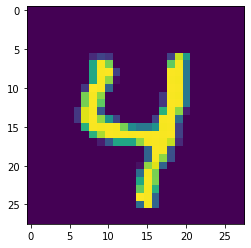

8


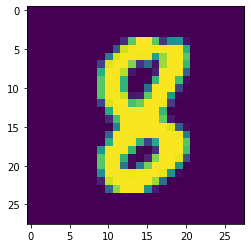

2


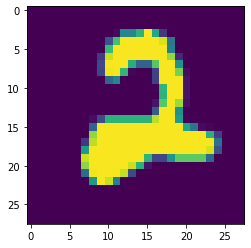

1


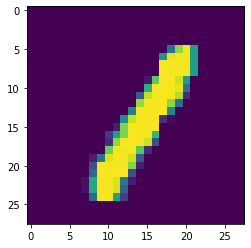

0


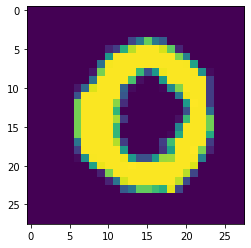

In [6]:
show5(train_loader)

7


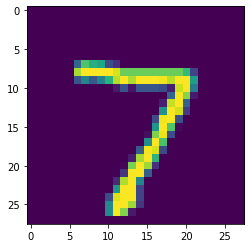

2


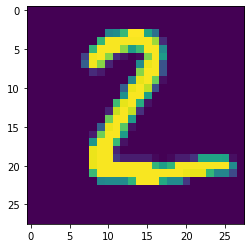

1


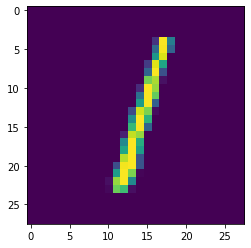

0


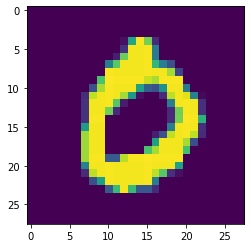

4


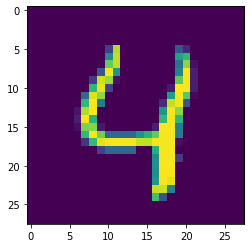

In [6]:
# Explore data
## YOUR CODE HERE ##
show5(test_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [4]:
## YOUR CODE HERE ##

class Net(nn.Module):
    def __init__(self):
        super().__init__()
#         self.f_output = nn.LogSoftmax(dim=1)
        self.activation = nn.ReLU()
        self.fc1 = nn.Linear(28*28, 100)
        self.fc2 = nn.Linear(100,10)
#         self.fc3 = nn.Linear(100,10)

    
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return x
    
net = Net().cuda()

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [5]:
## YOUR CODE HERE ##
learning_rate = 0.001
momentum = 0.9
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [36]:
# number of epochs to train the model
n_epochs = 10  # suggest training between 20-50 epochs

net.train() # prep model for training

train_loss_history = list()
val_loss_history = list()

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for batch_idx, (data, target) in tqdm.tqdm(
            enumerate(train_loader),
            desc="Training",
            total=len(train_loader),
            leave=True,
            ncols=80,
        ):
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
        
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = net(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
#         print(f'data size: {data.size()}, index 1: {data.size(1)}')
        # update running training loss
        
        train_loss += loss.item()*data.size(0) #data size 0 is  number of batch
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)
    train_loss_history.append(train_loss)
    
    # Validate
    with torch.no_grad():

        # set the model to evaluation mode
        net.eval()

        valid_loss = 0.0
        for batch_idx, (data, target) in tqdm.tqdm(
            enumerate(val_loader),
            desc="Validating",
            total=len(val_loader),
            leave=True,
            ncols=80,
        ):
            if torch.cuda.is_available():
                data, target = data.cuda(), target.cuda()

            # 1. forward pass: compute predicted outputs by passing inputs to the model
            output = net(data)  # =
            # 2. calculate the loss
            loss_value = criterion(output, target)  # =

            # Calculate average validation loss
            valid_loss = valid_loss + (
                (1 / (batch_idx + 1)) * (loss_value.data.item() - valid_loss)
            )
    
    val_loss_history.append(valid_loss)
    print(f"Epoch {epoch+1}: training loss {train_loss:.5f}, valid loss {valid_loss:.5f}")






Training:   0%|                                         | 0/375 [00:00<?, ?it/s]




Training:   0%|                                 | 1/375 [00:00<01:40,  3.72it/s]




Training:   1%|▍                                | 5/375 [00:00<01:13,  5.06it/s]




Training:   2%|▊                                | 9/375 [00:00<00:53,  6.81it/s]




Training:   3%|█                               | 13/375 [00:00<00:40,  8.96it/s]




Training:   5%|█▍                              | 17/375 [00:00<00:30, 11.56it/s]




Training:   6%|█▉                              | 22/375 [00:00<00:23, 14.83it/s]




Training:   7%|██▎                             | 27/375 [00:00<00:18, 18.50it/s]




Training:   9%|██▋                             | 32/375 [00:01<00:15, 22.44it/s]




Training:  10%|███▏                            | 37/375 [00:01<00:12, 26.39it/s]




Training:  11%|███▌                            | 42/375 [00:01<00:11, 30.14it/s]




Training:  13%|████                            | 47/375 [00:

Epoch 1: training loss 0.48897, valid loss 0.32135







Training:   0%|                                 | 1/375 [00:00<01:52,  3.33it/s]




Training:   2%|▌                                | 6/375 [00:00<01:19,  4.63it/s]




Training:   3%|▉                               | 11/375 [00:00<00:57,  6.33it/s]




Training:   4%|█▎                              | 16/375 [00:00<00:42,  8.53it/s]




Training:   6%|█▊                              | 21/375 [00:00<00:31, 11.27it/s]




Training:   7%|██▏                             | 26/375 [00:00<00:23, 14.56it/s]




Training:   8%|██▋                             | 31/375 [00:00<00:18, 18.33it/s]




Training:  10%|███                             | 36/375 [00:01<00:15, 22.26it/s]




Training:  11%|███▍                            | 41/375 [00:01<00:12, 26.36it/s]




Training:  12%|███▉                            | 46/375 [00:01<00:10, 30.15it/s]




Training:  14%|████▎                           | 51/375 [00:01<00:09, 33.20it/s]




Training:  15%|████▊                           | 56/375 [00:

Epoch 2: training loss 0.27030, valid loss 0.24646







Training:   0%|                                 | 1/375 [00:00<01:49,  3.41it/s]




Training:   2%|▌                                | 6/375 [00:00<01:18,  4.71it/s]




Training:   3%|▉                               | 11/375 [00:00<00:56,  6.42it/s]




Training:   4%|█▎                              | 15/375 [00:00<00:42,  8.56it/s]




Training:   5%|█▋                              | 20/375 [00:00<00:31, 11.28it/s]




Training:   7%|██▏                             | 25/375 [00:00<00:24, 14.53it/s]




Training:   8%|██▌                             | 30/375 [00:00<00:18, 18.17it/s]




Training:   9%|██▉                             | 34/375 [00:01<00:15, 21.61it/s]




Training:  10%|███▎                            | 39/375 [00:01<00:13, 25.38it/s]




Training:  12%|███▊                            | 44/375 [00:01<00:11, 29.09it/s]




Training:  13%|████▏                           | 49/375 [00:01<00:10, 32.16it/s]




Training:  14%|████▌                           | 54/375 [00:

Epoch 3: training loss 0.20592, valid loss 0.20533







Training:   0%|                                 | 1/375 [00:00<01:23,  4.50it/s]




Training:   1%|▏                                | 2/375 [00:00<01:10,  5.33it/s]




Training:   2%|▌                                | 7/375 [00:00<00:50,  7.25it/s]




Training:   3%|█                               | 12/375 [00:00<00:37,  9.70it/s]




Training:   5%|█▍                              | 17/375 [00:00<00:28, 12.72it/s]




Training:   6%|█▉                              | 22/375 [00:00<00:21, 16.25it/s]




Training:   7%|██▎                             | 27/375 [00:00<00:17, 20.20it/s]




Training:   9%|██▋                             | 32/375 [00:00<00:13, 24.53it/s]




Training:  10%|███▏                            | 37/375 [00:01<00:11, 28.44it/s]




Training:  11%|███▌                            | 42/375 [00:01<00:10, 32.44it/s]




Training:  13%|████                            | 47/375 [00:01<00:09, 35.51it/s]




Training:  14%|████▍                           | 52/375 [00:

Epoch 4: training loss 0.16430, valid loss 0.18001







Training:   0%|                                 | 1/375 [00:00<01:27,  4.26it/s]




Training:   1%|▎                                | 3/375 [00:00<01:07,  5.52it/s]




Training:   2%|▋                                | 8/375 [00:00<00:49,  7.49it/s]




Training:   3%|█                               | 13/375 [00:00<00:36,  9.95it/s]




Training:   5%|█▌                              | 18/375 [00:00<00:27, 12.98it/s]




Training:   6%|█▉                              | 23/375 [00:00<00:21, 16.44it/s]




Training:   7%|██▍                             | 28/375 [00:00<00:17, 20.25it/s]




Training:   9%|██▊                             | 33/375 [00:01<00:14, 24.32it/s]




Training:  10%|███▏                            | 38/375 [00:01<00:11, 28.09it/s]




Training:  11%|███▋                            | 43/375 [00:01<00:10, 31.50it/s]




Training:  13%|████                            | 48/375 [00:01<00:09, 34.28it/s]




Training:  14%|████▌                           | 53/375 [00:

Epoch 5: training loss 0.13722, valid loss 0.14928







Training:   0%|                                 | 1/375 [00:00<01:34,  3.96it/s]




Training:   1%|▎                                | 4/375 [00:00<01:10,  5.29it/s]




Training:   2%|▊                                | 9/375 [00:00<00:50,  7.20it/s]




Training:   4%|█▏                              | 14/375 [00:00<00:37,  9.62it/s]




Training:   5%|█▌                              | 19/375 [00:00<00:28, 12.59it/s]




Training:   6%|██                              | 24/375 [00:00<00:21, 16.02it/s]




Training:   8%|██▍                             | 29/375 [00:00<00:17, 19.77it/s]




Training:   9%|██▉                             | 34/375 [00:01<00:14, 23.66it/s]




Training:  10%|███▎                            | 39/375 [00:01<00:12, 27.58it/s]




Training:  12%|███▊                            | 44/375 [00:01<00:10, 31.09it/s]




Training:  13%|████▏                           | 49/375 [00:01<00:09, 33.75it/s]




Training:  14%|████▌                           | 54/375 [00:

Epoch 6: training loss 0.11683, valid loss 0.14342







Training:   0%|                                 | 1/375 [00:00<01:29,  4.19it/s]




Training:   1%|▏                                | 2/375 [00:00<01:13,  5.08it/s]




Training:   2%|▌                                | 7/375 [00:00<00:53,  6.91it/s]




Training:   3%|▉                               | 11/375 [00:00<00:39,  9.18it/s]




Training:   4%|█▎                              | 16/375 [00:00<00:29, 11.99it/s]




Training:   6%|█▊                              | 21/375 [00:00<00:23, 15.34it/s]




Training:   7%|██▏                             | 26/375 [00:00<00:18, 19.09it/s]




Training:   8%|██▋                             | 31/375 [00:01<00:14, 23.03it/s]




Training:  10%|███                             | 36/375 [00:01<00:12, 26.77it/s]




Training:  11%|███▍                            | 41/375 [00:01<00:11, 30.28it/s]




Training:  12%|███▉                            | 46/375 [00:01<00:09, 33.13it/s]




Training:  14%|████▎                           | 51/375 [00:

Epoch 7: training loss 0.10133, valid loss 0.13235







Training:   0%|                                 | 1/375 [00:00<01:29,  4.18it/s]




Training:   1%|▎                                | 3/375 [00:00<01:08,  5.42it/s]




Training:   2%|▋                                | 8/375 [00:00<00:49,  7.36it/s]




Training:   3%|█                               | 13/375 [00:00<00:36,  9.83it/s]




Training:   5%|█▌                              | 18/375 [00:00<00:27, 12.85it/s]




Training:   6%|█▉                              | 23/375 [00:00<00:21, 16.37it/s]




Training:   7%|██▍                             | 28/375 [00:00<00:17, 20.08it/s]




Training:   9%|██▊                             | 33/375 [00:01<00:14, 23.94it/s]




Training:  10%|███▏                            | 38/375 [00:01<00:12, 27.79it/s]




Training:  11%|███▋                            | 43/375 [00:01<00:10, 31.34it/s]




Training:  13%|████                            | 48/375 [00:01<00:09, 34.43it/s]




Training:  14%|████▌                           | 53/375 [00:

Epoch 8: training loss 0.09294, valid loss 0.13491







Training:   0%|                                 | 1/375 [00:00<01:38,  3.80it/s]




Training:   1%|▎                                | 4/375 [00:00<01:12,  5.14it/s]




Training:   2%|▊                                | 9/375 [00:00<00:52,  6.98it/s]




Training:   4%|█▏                              | 14/375 [00:00<00:38,  9.36it/s]




Training:   5%|█▌                              | 19/375 [00:00<00:28, 12.29it/s]




Training:   6%|██                              | 24/375 [00:00<00:22, 15.75it/s]




Training:   8%|██▍                             | 29/375 [00:00<00:17, 19.60it/s]




Training:   9%|██▉                             | 34/375 [00:01<00:14, 23.53it/s]




Training:  10%|███▎                            | 39/375 [00:01<00:12, 27.38it/s]




Training:  12%|███▊                            | 44/375 [00:01<00:10, 30.99it/s]




Training:  13%|████▏                           | 49/375 [00:01<00:09, 34.49it/s]




Training:  14%|████▌                           | 54/375 [00:

Epoch 9: training loss 0.08304, valid loss 0.11812







Training:   0%|                                 | 1/375 [00:00<01:42,  3.63it/s]




Training:   1%|▍                                | 5/375 [00:00<01:14,  4.98it/s]




Training:   3%|▊                               | 10/375 [00:00<00:53,  6.79it/s]




Training:   4%|█▎                              | 15/375 [00:00<00:39,  9.07it/s]




Training:   5%|█▋                              | 20/375 [00:00<00:29, 11.91it/s]




Training:   7%|██▏                             | 25/375 [00:00<00:22, 15.27it/s]




Training:   8%|██▌                             | 30/375 [00:00<00:18, 19.08it/s]




Training:   9%|██▉                             | 35/375 [00:01<00:14, 23.05it/s]




Training:  11%|███▍                            | 40/375 [00:01<00:12, 26.97it/s]




Training:  12%|███▊                            | 45/375 [00:01<00:10, 30.68it/s]




Training:  13%|████▎                           | 50/375 [00:01<00:09, 33.85it/s]




Training:  15%|████▋                           | 55/375 [00:

Epoch 10: training loss 0.07342, valid loss 0.11351


Plot the training loss (and validation loss/accuracy, if recorded).

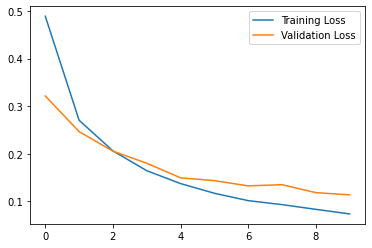

In [37]:
## YOUR CODE HERE ##
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend() 
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [38]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0.0 for i in range(10))
class_total = list(0.0 for i in range(10))

net.eval()  # prep model for *evaluation*

for batch_idx, (data, target) in tqdm.tqdm(
    enumerate(test_loader),
    desc="Testing",
    total=len(test_loader),
    leave=True,
    ncols=80,
):
    if torch.cuda.is_available():
        data, target = data.cuda(), target.cuda()
        
    # forward pass: compute predicted outputs by passing inputs to the model
    output = net(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss
    test_loss += loss.item() * data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(data.shape[0]):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss / len(test_loader.dataset)
print(f"Test Loss: {test_loss:.6f}\n")

for i in range(10):
    if class_total[i] > 0:
        print(
            f"Test Accuracy of {i}: {100 * class_correct[i] / class_total[i]:.2f}%% "
            f"({int(np.sum(class_correct[i]))}/{int(np.sum(class_total[i]))})"
        )
    else:
        print(f"Test Accuracy of {classes[i]}: N/A (no training examples)")

print(
    f"\nTest Accuracy (Overall): {100.0 * np.sum(class_correct) / np.sum(class_total)}%% "
    f"({int(np.sum(class_correct))}/{int(np.sum(class_total))})"
)






Testing:   0%|                                           | 0/79 [00:00<?, ?it/s]




Testing:   5%|█▊                                 | 4/79 [00:00<00:02, 34.47it/s]




Testing:  10%|███▌                               | 8/79 [00:00<00:02, 34.60it/s]




Testing:  15%|█████▏                            | 12/79 [00:00<00:01, 34.48it/s]




Testing:  20%|██████▉                           | 16/79 [00:00<00:01, 34.22it/s]




Testing:  25%|████████▌                         | 20/79 [00:00<00:01, 34.04it/s]




Testing:  29%|█████████▉                        | 23/79 [00:00<00:01, 32.48it/s]




Testing:  33%|███████████▏                      | 26/79 [00:00<00:01, 31.39it/s]




Testing:  38%|████████████▉                     | 30/79 [00:00<00:01, 31.10it/s]




Testing:  42%|██████████████▏                   | 33/79 [00:01<00:01, 30.40it/s]




Testing:  47%|███████████████▉                  | 37/79 [00:01<00:01, 30.91it/s]




Testing:  52%|█████████████████▋                | 41/79 [00:

Test Loss: 0.101385

Test Accuracy of 0: 98.47%% (965/980)
Test Accuracy of 1: 98.94%% (1123/1135)
Test Accuracy of 2: 95.83%% (989/1032)
Test Accuracy of 3: 97.82%% (988/1010)
Test Accuracy of 4: 95.01%% (933/982)
Test Accuracy of 5: 97.42%% (869/892)
Test Accuracy of 6: 96.97%% (929/958)
Test Accuracy of 7: 97.28%% (1000/1028)
Test Accuracy of 8: 95.69%% (932/974)
Test Accuracy of 9: 95.14%% (960/1009)

Test Accuracy (Overall): 96.88%% (9688/10000)


# visualizing the prediction of our model with test dataset

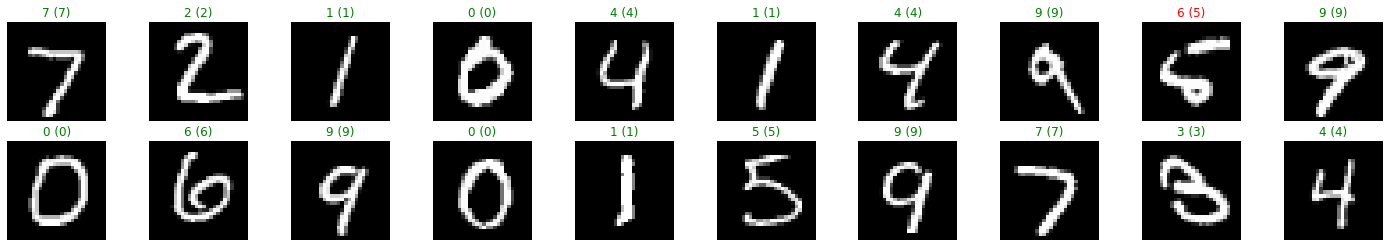

In [39]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

images, labels = images.cuda(), labels.cuda()

# get sample outputs
output = net(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.cpu()

# plot the images in the batch, along with predicted and true labels
fig, subs = plt.subplots(2, 10, figsize=(25, 4))
for idx, sub in zip(range(20), subs.flatten()):
    sub.imshow(np.squeeze(images[idx]), cmap='gray')
    sub.set_title(f"{str(preds[idx].item())} ({str(labels[idx].item())})",
                 color=("green" if preds[idx]==labels[idx] else "red"))
    sub.axis("off")

## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

# My improve model

Since my first model is perform very well, i decide to add just only a layer as hidden layers in this structure which contains 100 units.

In addition, from the previous experiment, i observed that loss can drop more. For this reason, i decide to train more 10 rounds.

In [16]:
class Net2(nn.Module):
    def __init__(self):
        super().__init__()
#         self.f_output = nn.LogSoftmax(dim=1)
        self.activation = nn.ReLU()
        self.fc1 = nn.Linear(28*28, 100)
        self.fc2 = nn.Linear(100,100)
        self.fc3 = nn.Linear(100,10)

    
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x
    
net_optimize = Net2().cuda()

learning_rate = 0.001
momentum = 0.9
optimizer = optim.SGD(net_optimize.parameters(), lr=learning_rate, momentum=momentum)
criterion = nn.CrossEntropyLoss()

In [ ]:
# number of epochs to train the model
n_epochs = 20  # suggest training between 20-50 epochs

net_optimize.train() # prep model for training

train_loss_history = list()
val_loss_history = list()

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for batch_idx, (data, target) in tqdm.tqdm(
            enumerate(train_loader),
            desc="Training",
            total=len(train_loader),
            leave=True,
            ncols=80,
        ):
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
        
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = net_optimize(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
#         print(f'data size: {data.size()}, index 1: {data.size(1)}')
        # update running training loss
        
        train_loss += loss.item()*data.size(0) #data size 0 is  number of batch
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)
    train_loss_history.append(train_loss)
    
    # Validate
    with torch.no_grad():

        # set the model to evaluation mode
        net_optimize.eval()

        valid_loss = 0.0
        for batch_idx, (data, target) in tqdm.tqdm(
            enumerate(val_loader),
            desc="Validating",
            total=len(val_loader),
            leave=True,
            ncols=80,
        ):
            if torch.cuda.is_available():
                data, target = data.cuda(), target.cuda()

            # 1. forward pass: compute predicted outputs by passing inputs to the model
            output = net_optimize(data)  # =
            # 2. calculate the loss
            loss_value = criterion(output, target)  # =

            # Calculate average validation loss
            valid_loss = valid_loss + (
                (1 / (batch_idx + 1)) * (loss_value.data.item() - valid_loss)
            )
    
    val_loss_history.append(valid_loss)
    print(f"Epoch {epoch+1}: training loss {train_loss:.5f}, valid loss {valid_loss:.5f}")

Training:   0%|                                         | 0/375 [00:00<?, ?it/s]

Epoch 1: training loss 1.68594, valid loss 0.88806


Training:   0%|                                         | 0/375 [00:00<?, ?it/s]

Epoch 2: training loss 0.61643, valid loss 0.49034


Training:   0%|                                         | 0/375 [00:00<?, ?it/s]

Epoch 3: training loss 0.42491, valid loss 0.40633


Training:   0%|                                         | 0/375 [00:00<?, ?it/s]

Epoch 4: training loss 0.36667, valid loss 0.36985


Training:   0%|                                         | 0/375 [00:00<?, ?it/s]

Epoch 5: training loss 0.33834, valid loss 0.35339


Training:   0%|                                         | 0/375 [00:00<?, ?it/s]

Epoch 6: training loss 0.31743, valid loss 0.33295


Training:   0%|                                         | 0/375 [00:00<?, ?it/s]

Epoch 7: training loss 0.30269, valid loss 0.31932


Training:   0%|                                         | 0/375 [00:00<?, ?it/s]

Epoch 8: training loss 0.28990, valid loss 0.31261


Training:   0%|                                         | 0/375 [00:00<?, ?it/s]

Epoch 9: training loss 0.27815, valid loss 0.29721


Training:   0%|                                         | 0/375 [00:00<?, ?it/s]

Epoch 10: training loss 0.26787, valid loss 0.28884


Training:   0%|                                         | 0/375 [00:00<?, ?it/s]

Epoch 11: training loss 0.25866, valid loss 0.27932


Training:   0%|                                         | 0/375 [00:00<?, ?it/s]

Epoch 12: training loss 0.24983, valid loss 0.27265


Training:   0%|                                         | 0/375 [00:00<?, ?it/s]

Epoch 13: training loss 0.24164, valid loss 0.26422


Training:   0%|                                         | 0/375 [00:00<?, ?it/s]

Epoch 14: training loss 0.23305, valid loss 0.25862


Training:   0%|                                         | 0/375 [00:00<?, ?it/s]

Epoch 15: training loss 0.22561, valid loss 0.24925


Training:   0%|                                         | 0/375 [00:00<?, ?it/s]

Epoch 16: training loss 0.21723, valid loss 0.24381


Training:   0%|                                         | 0/375 [00:00<?, ?it/s]

Epoch 17: training loss 0.21053, valid loss 0.23617


Training:  22%|███████▏                        | 84/375 [00:02<00:07, 41.18it/s]

In [ ]:
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend() 
plt.show()

# testing with our optimize model

In [ ]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0.0 for i in range(10))
class_total = list(0.0 for i in range(10))

net_optimize.eval()  # prep model for *evaluation*

for batch_idx, (data, target) in tqdm.tqdm(
    enumerate(test_loader),
    desc="Testing",
    total=len(test_loader),
    leave=True,
    ncols=80,
):
    if torch.cuda.is_available():
        data, target = data.cuda(), target.cuda()
        
    # forward pass: compute predicted outputs by passing inputs to the model
    output = net_optimize(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss
    test_loss += loss.item() * data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(data.shape[0]):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss / len(test_loader.dataset)
print(f"Test Loss: {test_loss:.6f}\n")

for i in range(10):
    if class_total[i] > 0:
        print(
            f"Test Accuracy of {i}: {100 * class_correct[i] / class_total[i]:.2f}%% "
            f"({int(np.sum(class_correct[i]))}/{int(np.sum(class_total[i]))})"
        )
    else:
        print(f"Test Accuracy of {classes[i]}: N/A (no training examples)")

print(
    f"\nTest Accuracy (Overall): {100.0 * np.sum(class_correct) / np.sum(class_total)}%% "
    f"({int(np.sum(class_correct))}/{int(np.sum(class_total))})"
)

## Saving your model
Using `torch.save`, save your model for future loading.

In [ ]:
## YOUR CODE HERE ##
MODEL_NAME = "model/my_custom_model_MNIST1.pth"
torch.save(obj=net_optimize.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_NAME)